# NAICS API calls

In [10]:
# import libraries 
from requests import Request, Session
import pandas as pd
import json
from matplotlib import pyplot as plt

In [11]:
# using api from Census data 
url = 'https://api.census.gov/data/2021/cbp?get=EMP,NAME&for=state:*&NAICS2017=51'

In [12]:
# renaming session to be easier to be called
session = Session()
response = session.get(url)
# loading data as json text
data = json.loads(response.text)
print(data)

[['EMP', 'NAME', 'NAICS2017', 'state'], ['27332', 'Alabama', '51', '01'], ['6334', 'Alaska', '51', '02'], ['23291', 'Kansas', '51', '20'], ['90819', 'Ohio', '51', '39'], ['22982', 'Oklahoma', '51', '40'], ['33430', 'South Carolina', '51', '45'], ['248110', 'Texas', '51', '48'], ['51131', 'Arizona', '51', '04'], ['133', 'American Samoa', '51', '60'], ['346', 'Commonwealth of the Northern Mariana Islands', '51', '69'], ['399', 'United States Virgin Islands', '51', '78'], ['733292', 'California', '51', '06'], ['35013', 'Connecticut', '51', '09'], ['162422', 'Florida', '51', '12'], ['115131', 'Georgia', '51', '13'], ['110510', 'Illinois', '51', '17'], ['27201', 'Kentucky', '51', '21'], ['45146', 'Maryland', '51', '24'], ['59273', 'Michigan', '51', '26'], ['57439', 'Minnesota', '51', '27'], ['10883', 'Mississippi', '51', '28'], ['51926', 'Missouri', '51', '29'], ['80101', 'New Jersey', '51', '34'], ['300382', 'New York', '51', '36'], ['86053', 'North Carolina', '51', '37'], ['105124', 'Penn

In [30]:
# Create a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
print(df)

       EMP                                          NAME NAICS2017 state
0    27332                                       Alabama        51    01
1     6334                                        Alaska        51    02
2    23291                                        Kansas        51    20
3    90819                                          Ohio        51    39
4    22982                                      Oklahoma        51    40
5    33430                                South Carolina        51    45
6   248110                                         Texas        51    48
7    51131                                       Arizona        51    04
8      133                                American Samoa        51    60
9      346  Commonwealth of the Northern Mariana Islands        51    69
10     399                  United States Virgin Islands        51    78
11  733292                                    California        51    06
12   35013                                   Connec

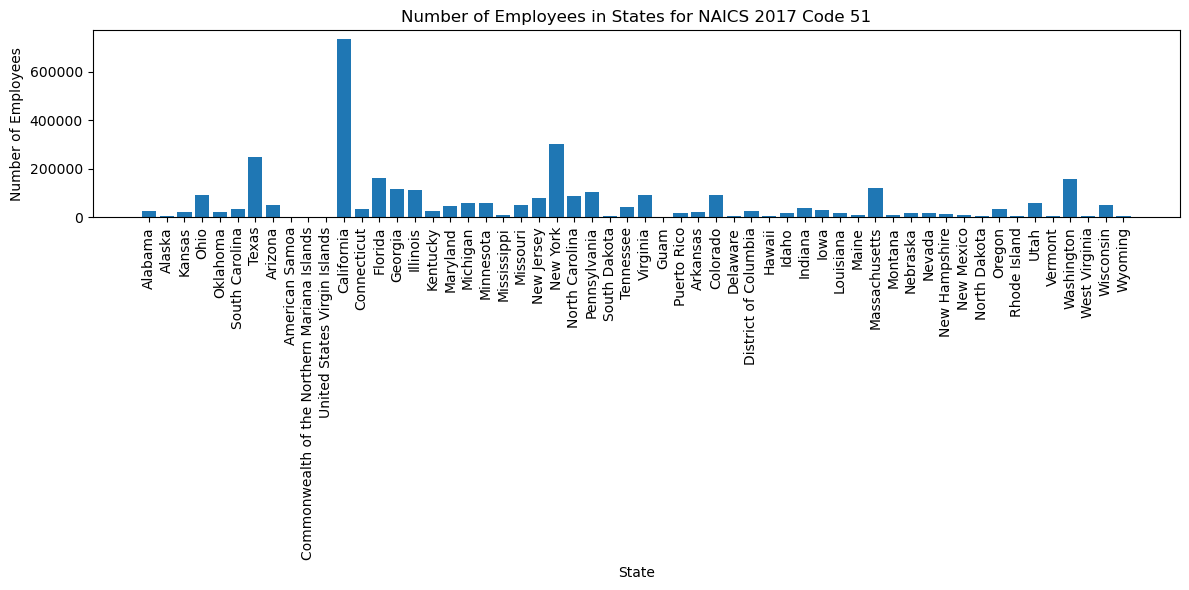

In [25]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['NAME'], df['EMP'])
plt.xlabel('State')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in States for NAICS 2017 Code 51')
plt.xticks(rotation=90)
plt.tight_layout()